# Import Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline

## Data from 2012, 2016, 2020

In [2]:
# Import Data 
train2012 = pd.read_csv("/Users/wenniehu/Desktop/IMT575/ProjectData/train2012.csv")
train2016 = pd.read_csv("/Users/wenniehu/Desktop/IMT575/ProjectData/train2016.csv")
train2020 = pd.read_csv("/Users/wenniehu/Desktop/IMT575/ProjectData/train2020.csv")
print(train2012.shape, train2016.shape, train2020.shape)

(13705, 6) (30151, 6) (56121, 7)


In [3]:
# Inspect whether raw data has NaN

print('--for train2012--')
for c in train2012.columns.values:
    if np.sum(train2012[c].isna()) > 0 :
        print(c)
    else: 
        print(c, '-no NaN')
        continue
print('\n')

print('--for train2016--')
for c in train2016.columns.values:
    if np.sum(train2016[c].isna()) > 0 :
        print(c)
    else: 
        print(c, '-no NaN')
        continue
print('\n')

print('--for train2020--')
for c in train2020.columns.values:
    if np.sum(train2020[c].isna()) > 0 :
        print(c)
    else: 
        print(c, '-no NaN')
        continue

--for train2012--
Datetime -no NaN
Text
TweetID -no NaN
username -no NaN
geo
Party -no NaN


--for train2016--
Datetime -no NaN
Text
TweetID -no NaN
username -no NaN
geo
Party -no NaN


--for train2020--
Datetime -no NaN
Text
TweetID -no NaN
username -no NaN
geo
Party -no NaN
State


In [4]:
# Create a function to clean all three data
def clean_df(df):
    
    # Remove duplicate rows in each data
    cleandf = df.drop_duplicates('TweetID', keep = 'first')
    
    # Remove NA in the text column
    cleandf = cleandf.dropna(subset = ['Text'] )
    
    # Select relevant column
    cleandf = cleandf[['Text','username','Party']]
    
    # Remove independent class in Party variable
    cleandf = cleandf[cleandf['Party'] != 'I']
    
    return(cleandf)

In [5]:
# Pre-process dataframe
data2012 = clean_df(train2012)
data2016 = clean_df(train2016)
data2020 = clean_df(train2020)

print(data2012.shape, data2016.shape, data2020.shape)

(13084, 3) (29659, 3) (55459, 3)


In [6]:
# Return the top 10 politicians who tweets most frequently in 2012
data2012.groupby('username')['Text'].count().sort_values(ascending = False).head(10)

username
BarackObama       1084
SenSanders         709
JohnCornyn         670
SenJohnMcCain      521
MikeCrapo          497
MarkUdall          496
kaybaileyhutch     437
SenBlumenthal      325
RoyBlunt           313
ChuckGrassley      298
Name: Text, dtype: int64

In [7]:
# Return the top 10 politicians who tweets most frequently in 2016
data2016.groupby('username')['Text'].count().sort_values(ascending = False).head(10)

username
HillaryClinton     2728
realDonaldTrump    1440
CoryBooker         1279
SenRickScott       1240
JohnCornyn         1188
senrobportman      1045
SenTomCotton        972
SenSanders          742
SenatorDurbin       647
SenatorBaldwin      609
Name: Text, dtype: int64

In [8]:
# Return the top 10 politicians who tweets most frequently in 2020
data2020.groupby('username')['Text'].count().sort_values(ascending = False).head(10)

username
AndrewYang         2199
realDonaldTrump    1894
JohnCornyn         1346
JoeBiden           1303
SenatorDurbin      1282
SenTedCruz         1166
SenRickScott       1126
PeteButtigieg      1034
SenSchumer         1006
senrobportman       964
Name: Text, dtype: int64

In [9]:
# Calculate number of Democratic tweets and Republican tweets for 2012, 2016 and 2020.
print('Number of Tweets by each party in 2012')
print(data2012['Party'].value_counts()/data2012.shape[0])
print('\n')

print('Number of Tweets by each party in 2016')
print(data2016['Party'].value_counts()/data2016.shape[0])
print('\n')

print('Number of Tweets by each party in 2020')
print(data2020['Party'].value_counts()/data2020.shape[0])

Number of Tweets by each party in 2012
D    0.529272
R    0.470728
Name: Party, dtype: float64


Number of Tweets by each party in 2016
R    0.510166
D    0.489834
Name: Party, dtype: float64


Number of Tweets by each party in 2020
D    0.541716
R    0.458284
Name: Party, dtype: float64


In [10]:
# Add [Year] column into each dataframe 
data2012['Year'] = int(2012)
data2016['Year'] = int(2016)
data2020['Year'] = int(2020)

# Concatenate three data in a single df
dataall = pd.concat([data2012, data2016, data2020], axis = 0, ignore_index = True)
dataall.shape

(98202, 4)

# Text Processing

In [11]:
#pip install --upgrade unidecode

In [12]:
#pip install --upgrade emoji

In [13]:
#pip install nltk

In [14]:
# Import text processing packages

import re
from unidecode import unidecode
import emoji

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Import stop word and stemmer
stopwordslist = stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer= WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wenniehu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wenniehu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Text processing procedure
1.Remove http:// link <br>
https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk <br>
<br>
2.Convert accent character and unicode to ASCII (café to cafe)<br>
https://towardsdatascience.com/nlp-text-preprocessing-a-practical-guide-and-template-d80874676e79<br>
<br>
3a.Convert emoji to text(for sentimental analysis) <br>
https://towardsdatascience.com/twitter-sentiment-analysis-using-fasttext-9ccd04465597<br>
<br>
3b.Remove emoji entirely<br> 
https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf<br>
<br>
4a.Remove @mention and special character<br> 
https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk<br>
4b.Replace hyphen with space<br>
https://stackoverflow.com/questions/44333462/how-do-i-replace-hyphen-with-space-in-a-string-except-for-the-matched-patter<br>
<br>
5.Expand Contractions (not using pycontractions)<br>
https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python/47091370#47091370<br>
<br>
6.Remove punctuations<br>
<br>
7.Lowercase all texts<br>
<br>
8.Remove whitespace<br>
<br>
9.Replace newline and tab with space <br>
<br>
10a.Remove number<br>
https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908<br>
<br>
10b.Convert number words to number <br>
https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089<br>
<br>
11.Remove stopword <br>
<br>
12a.Lemmatize<br>
<br>
12b.Stemming<br>

## Text Processing I - Remove Emoji

In [15]:
# Create a Text Processing Function textprocessing()

emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase) 
    # Even though "Jenny's bag" will be contracted to "Jenny is bag", 
    # "what's" can be correctly decontracted to "what is"
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def textprocessing(tweet):
    #Ensure passing value is a string
    tweet = str(tweet)
    
    # Remove embedded link
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|''(?:%[0-9a-fA-F][0-9a-fA-F]))+','', tweet)
         
    # Convert Accented Characters and non-English to Enligh alpabet
    tweet = unidecode(tweet)
    
    # Retain emoji for sentiment analysis 
    # tweet = emoji.demojize(tweet).replace(':','')
    
    # Remove emoji entirely
    tweet = emoji_pattern.sub(r'', tweet)
    
    # Remove @mention 
    tweet = re.sub('(@[A-Za-z0-9_]+)', '', tweet)
    
    # Replace hyphen with space
    tweet = re.sub(r'-(?:(?<!\b[0-9]{4}-)|(?![0-9]{2}(?:[0-9]{2})?\b))', ' ', tweet)
    
    # Expand contraction
    tweet = decontracted(tweet)
    
    # Remove in-text punctuations
    tweet = re.sub(r'[^a-zA-Z0-9 \n]', '', tweet)
    
    # Lowercase the text and remove white spaces
    tweet = tweet.lower().strip()

    # Replace newline and tab with space 
    tweet = tweet.replace('\n', ' ').replace('\t', ' ')
    
    # Remove in-text numbers
    tweet =  re.sub(r'\d+', '', tweet)

    # Remove stopwords listed in the stopwordslist
    tweet =  ' '.join([word for word in tweet.split() if word not in stopwordslist])
    
    # Lemmatize then Stemming
    tweet = ' '.join([stemmer.stem(lemmatizer.lemmatize(word)) for word in tweet.split()])
    
    # Ensure tweet is in string format
    tweet = str(tweet)
    return(tweet)

In [16]:
dataall['Text'] = dataall['Text'].apply(lambda x: textprocessing(x))

## Text Processing II - Retain emoji

In [17]:
def textprocessing2(tweet):
    #Ensure passing value is a string
    tweet = str(tweet)
    
    # Remove embedded link
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|''(?:%[0-9a-fA-F][0-9a-fA-F]))+','', tweet)
         
    # Convert Accented Characters and non-English to Enligh alpabet
    tweet = unidecode(tweet)
    
    # Retain emoji for sentiment analysis 
    tweet = emoji.demojize(tweet).replace(':','')
    
    # Remove emoji entirely
    # tweet = emoji_pattern.sub(r'', tweet)
    
    # Remove @mention 
    tweet = re.sub('(@[A-Za-z0-9_]+)', '', tweet)
    
    # Replace hyphen with space
    tweet = re.sub(r'-(?:(?<!\b[0-9]{4}-)|(?![0-9]{2}(?:[0-9]{2})?\b))', ' ', tweet)
    
    # Expand contraction
    tweet = decontracted(tweet)
    
    # Remove in-text punctuations
    tweet = re.sub(r'[^a-zA-Z0-9 \n]', '', tweet)
    
    # Lowercase the text and remove white spaces
    tweet = tweet.lower().strip()

    # Replace newline and tab with space 
    tweet = tweet.replace('\n', ' ').replace('\t', ' ')
    
    # Remove in-text numbers
    tweet =  re.sub(r'\d+', '', tweet)

    # Remove stopwords listed in the stopwordslist
    tweet =  ' '.join([word for word in tweet.split() if word not in stopwordslist])
    
    # Lemmatize then Stemming
    tweet = ' '.join([stemmer.stem(lemmatizer.lemmatize(word)) for word in tweet.split()])
    
    # Ensure tweet is in string format
    tweet = str(tweet)
    return(tweet)

In [18]:
dataall['Text2'] = dataall['Text'].apply(lambda x: textprocessing2(x))

# Sentiment Analysis/ Polarity Calculation

In [19]:
#pip install textblob

In [20]:
from textblob import TextBlob

In [21]:
# Calculate polarity of each tweet
# Polarity - Remove emoji 
# Polarity2 - Retain emoji 

dataall['Polarity'] = dataall['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
dataall['Polarity2'] = dataall['Text2'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [22]:
print('The number of tweets that change polarity')
print(np.sum(dataall['Polarity'] != dataall['Polarity2']))
print('The percentage of tweets that change polarity')
print(1526/len(dataall))

The number of tweets that change polarity
1526
The percentage of tweets that change polarity
0.015539398382924991


Number of tweets that change polarity by two different text processing constitue a small number of all data (less than 2%). Because the two texeprocessing methods used yield similar results in polarity, textprocessing will be used.

In [23]:
# Remove Text2 and Polarity2 in the dataall
dataall = dataall.drop(columns = ['Text2', 'Polarity2'])

In [24]:
# Display the top 10 tweet with highest polarity by first textprocessing method
dataall.sort_values(by = 'Polarity', ascending = False).head(10)

,Text,username,Party,Year,Polarity
16496,thank awesom teacher give class best,CoryBooker,D,2016,1.0
90455,democrat best finest,realDonaldTrump,R,2020,1.0
25216,wish best amp virginian compet rio openingcere...,MarkWarner,D,2016,1.0
20128,best luck oregonian compet rio roadtorio orego...,SenJeffMerkley,D,2016,1.0
95974,pray son south bend tonight wish best famili t...,PeteButtigieg,D,2020,1.0
57967,get coronaviru relat text friend friend best t...,JohnCornyn,R,2020,1.0
95960,plan provid medicar want everyon access health...,PeteButtigieg,D,2020,1.0
20234,two lifesav organ team end breastcanc perfect ...,JerryMoran,R,2016,1.0
10659,continu work colleagu pa best bill possibl str...,RoyBlunt,R,2012,1.0
35647,freshcoast best coast doorcounti madeinwi bays...,SenatorBaldwin,D,2016,1.0


In [25]:
# Display the top 10 tweet with lowest polarity by first textprocessing method
dataall.sort_values(by = 'Polarity').head(10)

,Text,username,Party,Year,Polarity
667,histori record citizensunit decis one worst hi...,SenSanders,D,2012,-1.0
75393,lead urg presid automat extend work author dac...,SenatorDurbin,D,2020,-1.0
69393,trump administr remaininmexico polici affect t...,MartinHeinrich,D,2020,-1.0
57728,russia saudi arabia retreat u oil industri avo...,JohnCornyn,R,2020,-1.0
57864,worst case coronaviru scienc via,JohnCornyn,R,2020,-1.0
52509,nation guardsman mi put risk crisi forc mi gua...,SenGaryPeters,D,2020,-1.0
70232,cruel tactic creat chill environ immigr parent...,SenatorBennet,D,2020,-1.0
70272,yet anoth cruel deliber move trump administr i...,SenatorBennet,D,2020,-1.0
52316,call rubber stamp absolut worst profit colleg ...,SenWarren,D,2020,-1.0
90779,sleepi joe biden victori south carolina democr...,realDonaldTrump,R,2020,-1.0


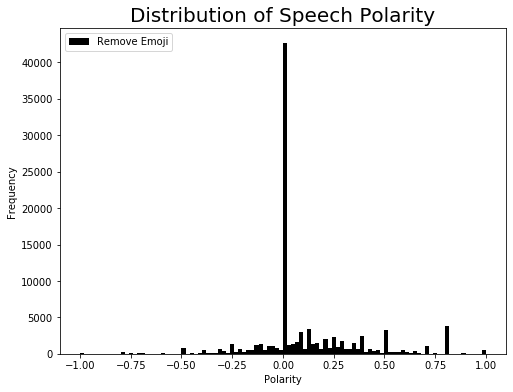

In [26]:
# Plot polarity distribution on the graph
plt.figure(figsize = (8, 6))
plt.hist(dataall['Polarity'], bins = 100, color = 'k', label = 'Remove Emoji')
plt.title('Distribution of Speech Polarity', fontsize = 20)
plt.xlabel('Polarity', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.legend(loc='upper left')
plt.show()

In [27]:
print('Number of neutral polarity tweets')
print(np.sum(dataall['Polarity'] == 0))

print('Percentage of neutral polarity tweets')
print(np.sum(dataall['Polarity'] == 0)/len(dataall))

Number of neutral polarity tweets
41952
Percentage of neutral polarity tweets
0.42720107533451457


There are exceptionally large data (43%) that has neutral polarity

In [28]:
print('Polarity Average by each year of data')
print(dataall.groupby(['Year']).mean()['Polarity'])
print('\n')

print('Polarity Average (exclude neutral tweets) by each year of data')
print(dataall[dataall['Polarity'] !=0].groupby(['Year']).mean()['Polarity'])

Polarity Average by each year of data
Year
2012    0.124717
2016    0.120693
2020    0.105518
Name: Polarity, dtype: float64


Polarity Average (exclude neutral tweets) by each year of data
Year
2012    0.257667
2016    0.258738
2020    0.162184
Name: Polarity, dtype: float64


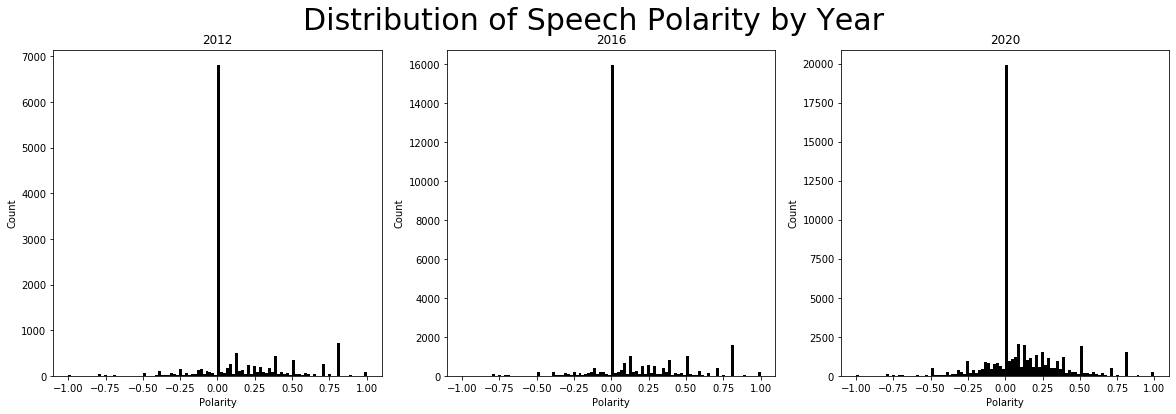

In [29]:
# Plot polarity distribution by each election year

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Speech Polarity by Year', fontsize = 30)

ax1.hist(dataall[dataall['Year'] == 2012]['Polarity'], bins = 100, color = 'k')
ax1.set_title('2012')
ax1.set(xlabel='Polarity', ylabel='Count')


ax2.hist(dataall[dataall['Year'] == 2016]['Polarity'], bins = 100, color = 'k')
ax2.set_title('2016')
ax2.set(xlabel='Polarity', ylabel='Count')


ax3.hist(dataall[dataall['Year'] == 2020]['Polarity'], bins = 100, color = 'k')
ax3.set_title('2020')
ax3.set(xlabel='Polarity', ylabel='Count')

plt.show()

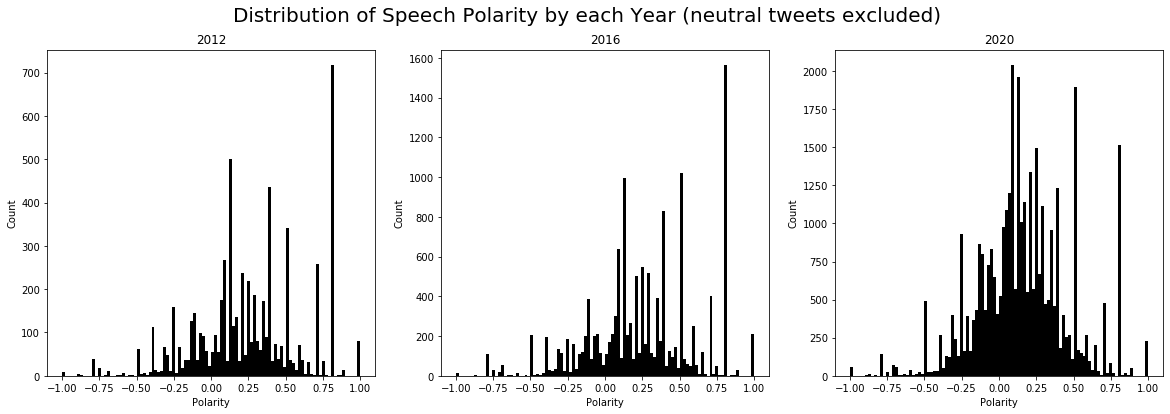

In [30]:
# Plot polarity distribution (exclude neutral tweets) by each election year

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Speech Polarity by each Year (neutral tweets excluded)', fontsize = 20)

ax1.hist(dataall[(dataall['Year'] == 2012) & (dataall['Polarity'] != 0)]['Polarity'], 
         bins = 100, color = 'k')
ax1.set_title('2012')
ax1.set(xlabel='Polarity', ylabel='Count')

ax2.hist(dataall[(dataall['Year'] == 2016) & (dataall['Polarity'] != 0)]['Polarity'], 
         bins = 100, color = 'k')
ax2.set_title('2016')
ax2.set(xlabel='Polarity', ylabel='Count')

ax3.hist(dataall[(dataall['Year'] == 2020) & (dataall['Polarity'] != 0)]['Polarity'], 
         bins = 100, color = 'k')
ax3.set_title('2020')
ax3.set(xlabel='Polarity', ylabel='Count')

plt.show()

In [31]:
print('Average polarity by each party')
dataall.groupby('Party').mean()['Polarity']

Average polarity by each party


Party
D    0.113217
R    0.112044
Name: Polarity, dtype: float64

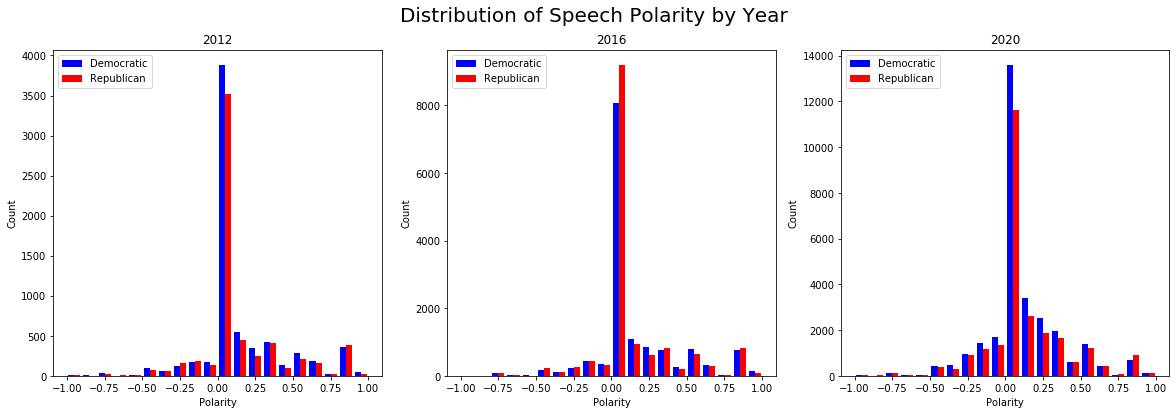

In [32]:
# Plot polarity distribution by different party by each election year

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Distribution of Speech Polarity by Year', fontsize = 20)

ax1.hist([dataall[(dataall['Year'] == 2012) & (dataall['Party']=='D')]['Polarity'],
          dataall[(dataall['Year'] == 2012)& (dataall['Party']=='R')]['Polarity']],
         bins = 20, color = ['b', 'r'], label = ['Democratic','Republican'])
ax1.set_title('2012')
ax1.set(xlabel='Polarity', ylabel='Count')
ax1.legend(loc='upper left')

ax2.hist([dataall[(dataall['Year'] == 2016) & (dataall['Party']=='D')]['Polarity'],
          dataall[(dataall['Year'] == 2016)& (dataall['Party']=='R')]['Polarity']], 
         bins = 20, color = ['b', 'r'], label = ['Democratic','Republican'])
ax2.set_title('2016')
ax2.set(xlabel='Polarity', ylabel='Count')
ax2.legend(loc='upper left')

ax3.hist([dataall[(dataall['Year'] == 2020) & (dataall['Party']=='D')]['Polarity'],
          dataall[(dataall['Year'] == 2020)& (dataall['Party']=='R')]['Polarity']], 
         bins = 20, color = ['b', 'r'], label = ['Democratic','Republican'])
ax3.set_title('2020')
ax3.set(xlabel='Polarity', ylabel='Count')
ax3.legend(loc='upper left')

plt.show()

# Tokenization

In [33]:
# Separate text out in the dataframe
data_text = dataall['Text']

# Set the index for each year
ind2012 = dataall[dataall['Year'] == 2012].index.values
ind2016 = dataall[dataall['Year'] == 2016].index.values
ind2020 = dataall[dataall['Year'] == 2020].index.values

In [34]:
# Import tokenization libraries and packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
# Create a function that yield the number of words from count vectorizer
def vectorized_matrix_size(data, ngram = (1,1), mindf = 1, maxdf = 1.0):
    vec = CountVectorizer(ngram_range = ngram, min_df = mindf , max_df = maxdf).fit(data)
    return(len(vec.get_feature_names()))

In [36]:
mtx = [vectorized_matrix_size(data_text, n, m) for n in [(1,1),(2,2),(1,2)] for m in (range(1,11))]
ngram_df = pd.DataFrame(np.array(mtx).reshape(3,10), 
                        columns = ['min_df = ' + str(i) for i in range(1,11)],
                        index = ['unigram', 'bigram', 'unigram+bigram'])
ngram_df

,min_df = 1,min_df = 2,min_df = 3,min_df = 4,min_df = 5,min_df = 6,min_df = 7,min_df = 8,min_df = 9,min_df = 10
unigram,34749,18684,14279,11969,10541,9465,8722,8149,7634,7207
bigram,600109,157005,82369,53774,39095,30175,24363,20254,17162,14857
unigram+bigram,634858,175689,96648,65743,49636,39640,33085,28403,24796,22064


In [37]:
# Tokenize and set the minimum of word frequency to appear in at least 10 tweets
vec = CountVectorizer(min_df = 10)
vec.fit(data_text)
vec_counts = vec.transform(data_text)

# Use matrix form for computational efficiency
vec_mx = vec_counts.toarray()

# Create a vectorized and transformed training dataframe
vec_df = pd.DataFrame(vec_mx, columns = vec.get_feature_names())
print(vec_df.shape)

(98202, 7207)


In [38]:
# Display top 30 frequent word tweeted across three election year
np.sum(vec_df, axis = 0).sort_values(ascending=False).head(30).index.values

array(['amp', 'need', 'help', 'work', 'today', 'american', 'senat',
       'thank', 'health', 'covid', 'trump', 'presid', 'state', 'get',
       'make', 'peopl', 'time', 'famili', 'support', 'coronaviru', 'care',
       'protect', 'great', 'must', 'nation', 'commun', 'new', 'act',
       'busi', 'day'], dtype=object)

The top frequently used words in the training data by appearance. The stemmed word is counted by the number of times it appears in the training data as opposed to sum of binary response which disregard the number of occurence in each tweet (if it appears in the document then the count is 1 regardless of how many occurence). 

In [39]:
# Display top 30 frequent word tweeted in 2012
np.sum(vec_df.iloc[ind2012], axis = 0).sort_values(ascending=False).head(30).index.values

array(['amp', 'today', 'obama', 'job', 'senat', 'presid', 'great',
       'thank', 'help', 'sen', 'need', 'work', 'tax', 'day', 'new',
       'american', 'vote', 'get', 'bill', 'join', 'make', 'year',
       'support', 'go', 'rt', 'famili', 'nation', 'would', 'good', 'must'],
      dtype=object)

In [40]:
# Display top 30 frequent word tweeted in 2016
np.sum(vec_df.iloc[ind2016], axis = 0).sort_values(ascending=False).head(30).index.values

array(['amp', 'today', 'thank', 'help', 'great', 'work', 'famili', 'join',
       'hillari', 'american', 'need', 'make', 'new', 'trump', 'senat',
       'day', 'year', 'peopl', 'state', 'time', 'must', 'nation', 'bill',
       'support', 'proud', 'get', 'commun', 'honor', 'see', 'offic'],
      dtype=object)

In [41]:
# Display top 30 frequent word tweeted in 2020
np.sum(vec_df.iloc[ind2020], axis = 0).sort_values(ascending=False).head(30).index.values

array(['need', 'amp', 'work', 'help', 'american', 'covid', 'health',
       'coronaviru', 'today', 'trump', 'senat', 'care', 'state', 'get',
       'presid', 'peopl', 'protect', 'thank', 'time', 'support', 'make',
       'famili', 'busi', 'commun', 'must', 'nation', 'worker', 'act',
       'provid', 'continu'], dtype=object)

## Bigram Tokenization & Analysis

In [42]:
# Tokenize and set the minimum of word frequency to appear in at least 10 tweets
vec_bigram = CountVectorizer(ngram_range = (2,2) , min_df = 10)
vec_counts_bigram = vec_bigram.fit_transform(data_text)

# Use matrix form for computational efficiency
vec_mx_bigram = vec_counts_bigram.toarray()

# Create a vectorized and transformed training dataframe
vecdf_bigram = pd.DataFrame(vec_mx_bigram, columns = vec_bigram.get_feature_names())
print(vecdf_bigram.shape)

(98202, 14857)


In [43]:
# Calculate top 30 frequent bi-gram word tweeted
np.sum(vecdf_bigram, axis = 0).sort_values(ascending=False).head(30).index.values

array(['health care', 'small busi', 'presid trump', 'make sure',
       'public health', 'donald trump', 'american peopl', 'look forward',
       'care act', 'across countri', 'unit state', 'trump administr',
       'presid obama', 'everi day', 'last night', 'coronaviru pandem',
       'covid pandem', 'front line', 'white hous', 'town hall',
       'work togeth', 'year ago', 'happi birthday', 'senat floor',
       'continu work', 'law enforc', 'last week', 'love one', 'men woman',
       'nation secur'], dtype=object)

In [44]:
# Calculate top 30 frequent bi-gram word tweeted in 2012
np.sum(vecdf_bigram.iloc[ind2012], axis = 0).sort_values(ascending=False).head(30).index.values

array(['presid obama', 'sen sander', 'look forward', 'small busi',
       'berni sander', 'sen berni', 'last night', 'senat floor',
       'middl class', 'must read', 'today news', 'watch live', 'news sen',
       'sander vt', 'vt vermont', 'health care', 'good luck', 'creat job',
       'op ed', 'senat inouy', 'town hall', 'pre obama', 'would like',
       'disclos act', 'vermont vt', 'thought prayer', 'discu issu',
       'feel free', 'mitt romney', 'staff thank'], dtype=object)

In [45]:
# Calculate top 30 frequent bi-gram word tweeted in 2016
np.sum(vecdf_bigram.iloc[ind2016], axis = 0).sort_values(ascending=False).head(30).index.values

array(['donald trump', 'happi birthday', 'hillari clinton', 'mobil offic',
       'last night', 'make sure', 'law enforc', 'look forward',
       'health care', 'op ed', 'presid obama', 'american peopl',
       'great meet', 'unit state', 'obama admin', 'crook hillari',
       'senat floor', 'year ago', 'watch live', 'small busi', 'hard work',
       'everi day', 'work togeth', 'last week', 'hurrican matthew',
       'great see', 'happi th', 'good luck', 'men woman', 'climat chang'],
      dtype=object)

In [46]:
# Calculate top 30 frequent bi-gram word tweeted in 2020
np.sum(vecdf_bigram.iloc[ind2020], axis = 0).sort_values(ascending=False).head(30).index.values

array(['health care', 'small busi', 'presid trump', 'public health',
       'make sure', 'american peopl', 'care act', 'across countri',
       'donald trump', 'trump administr', 'look forward',
       'coronaviru pandem', 'covid pandem', 'front line', 'unit state',
       'everi day', 'white hous', 'care worker', 'town hall',
       'continu work', 'social distanc', 'relief packag', 'work togeth',
       'health crisi', 'love one', 'state local', 'impeach trial',
       'stay home', 'save life', 'last week'], dtype=object)

# Topic Modeling by LDA

[Reference] https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/#7createthedocumentwordmatrix
<br>
[Reference] https://stackoverflow.com/questions/45658014/how-to-interpret-sklearn-lda-perplexity-score-why-it-always-increase-as-number

In [48]:
# Import LDA libraries and packages
from sklearn.decomposition import LatentDirichletAllocation as LDA
import pyLDAvis
from pyLDAvis import sklearn

In [49]:
# Create individual vectorized matrix for each year 2012, 2016, 2020

# 2012
mx2012 = vec_mx[ind2012]
print(mx2012.shape)

# 2016 
mx2016 = vec_mx[ind2016]
print(mx2016.shape)

# 2020 
mx2020 = vec_mx[ind2020]
print(mx2020.shape)

(13084, 7207)
(29659, 7207)
(55459, 7207)


In [50]:
# Set LDA n_components with an array of values
lda_n_comp_arr = np.arange(3, 21, 3)

## Topic Number Optimization for 2012

In [51]:
# Log Likelyhood: Higher the better
# Perplexity: Lower the better.

In [52]:
# Find optimal topic in 2012 data
log2012 = []
perp2012 = []

for n in lda_n_comp_arr:
    lda_mod = LDA(n_components = n, random_state = 123)
    lda_mod.fit(mx2012)
    log2012.append(lda_mod.score(mx2012)) 
    perp2012.append(lda_mod.perplexity(mx2012))

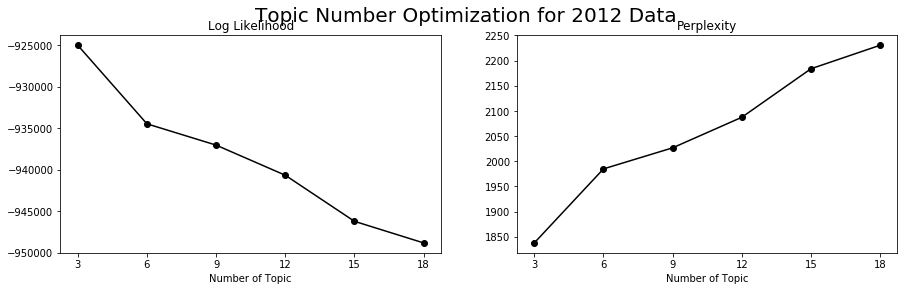

In [53]:
# Plot log-likelihood and perplexity 
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 4))
fig.suptitle('Topic Number Optimization for 2012 Data', fontsize= 20)

ax1.plot(lda_n_comp_arr, log2012, 'o-k')
ax1.set_title('Log Likelihood')
ax1.set(xlabel = 'Number of Topic')
ax1.set_xticks(lda_n_comp_arr)

ax2.plot(lda_n_comp_arr, perp2012, 'o-k')
ax2.set_title('Perplexity')
ax2.set(xlabel = 'Number of Topic')
ax2.set_xticks(lda_n_comp_arr)

plt.show()

Because we know the higher the Log Likelihood and the lower the perplexity, the better the LDA model is, the optimal topic number for 2012 data is 3.

## Topic Number Optimization for 2016

In [54]:
# Find optimal topic in 2016 data
log2016 = []
perp2016 = []

for n in lda_n_comp_arr:
    lda_mod = LDA(n_components = n, random_state = 123)
    lda_mod.fit(mx2016)
    log2016.append(lda_mod.score(mx2016)) # Log Likelyhood: Higher the better
    perp2016.append(lda_mod.perplexity(mx2016)) # Perplexity: Lower the better.

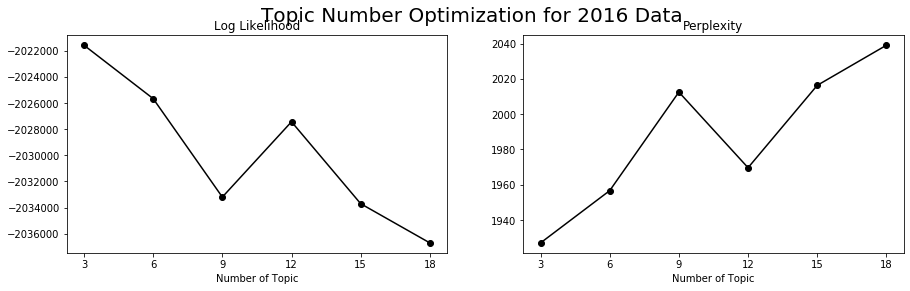

In [55]:
# Plot log-likelihood and perplexity
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 4))
fig.suptitle('Topic Number Optimization for 2016 Data', fontsize= 20)

ax1.plot(lda_n_comp_arr, log2016, 'o-k')
ax1.set_title('Log Likelihood')
ax1.set(xlabel = 'Number of Topic')
ax1.set_xticks(lda_n_comp_arr)

ax2.plot(lda_n_comp_arr, perp2016, 'o-k')
ax2.set_title('Perplexity')
ax2.set(xlabel = 'Number of Topic')
ax2.set_xticks(lda_n_comp_arr)

plt.show()

Because we know the higher the Log Likelihood and the lower the perplexity, the better the LDA model is, the optimal topic number for 2016 data is 3 as well.

## Topic Number Optimization for 2020

In [56]:
# Find optimal topic in 2020 data
log2020 = []
perp2020 = []

for n in lda_n_comp_arr:
    lda_mod = LDA(n_components = n, random_state = 123)
    lda_mod.fit(mx2020)
    log2020.append(lda_mod.score(mx2020)) # Log Likelyhood: Higher the better
    perp2020.append(lda_mod.perplexity(mx2020)) # Perplexity: Lower the better.

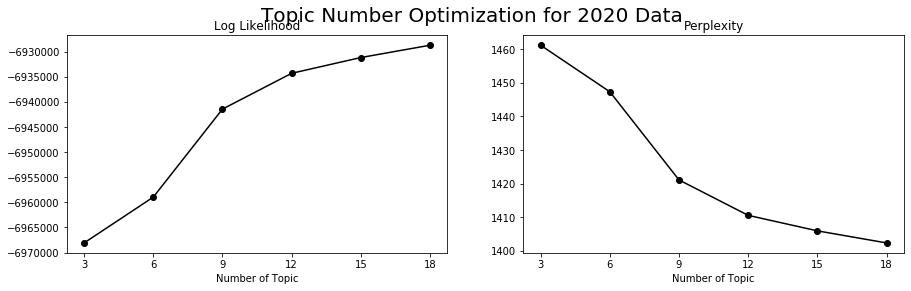

In [57]:
# Plot log-likelihood and perplexity
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 4))
fig.suptitle('Topic Number Optimization for 2020 Data', fontsize= 20)

ax1.plot(lda_n_comp_arr, log2020, 'o-k')
ax1.set_title('Log Likelihood')
ax1.set(xlabel = 'Number of Topic')
ax1.set_xticks(lda_n_comp_arr)

ax2.plot(lda_n_comp_arr, perp2020, 'o-k')
ax2.set_title('Perplexity')
ax2.set(xlabel = 'Number of Topic')
ax2.set_xticks(lda_n_comp_arr)

plt.show()

Because we know the higher the Log Likelihood and the lower the perplexity, the better the LDA model is, the optimal topic number for 2020 data is 18.

In [58]:
print('The optimal topic number for 2012 data is: ',lda_n_comp_arr[log2012.index(max(log2012))])
print('The optimal topic number for 2016 data is: ',lda_n_comp_arr[log2016.index(max(log2016))])
print('The optimal topic number for 2020 data is: ',lda_n_comp_arr[log2020.index(max(log2020))])
print('\n')
print('The optimal topic number for 2012 data is: ',lda_n_comp_arr[perp2012.index(min(perp2012))])
print('The optimal topic number for 2016 data is: ',lda_n_comp_arr[perp2016.index(min(perp2016))])
print('The optimal topic number for 2020 data is: ',lda_n_comp_arr[perp2020.index(min(perp2020))])

The optimal topic number for 2012 data is:  3
The optimal topic number for 2016 data is:  3
The optimal topic number for 2020 data is:  18


The optimal topic number for 2012 data is:  3
The optimal topic number for 2016 data is:  3
The optimal topic number for 2020 data is:  18


In [59]:
# Define a function that can display top n keywords for each topic
def topic_keywords(vectorizer=vec, lda_model=lda_mod, n_words=20):
    keywords = np.array(vec.get_feature_names())
    topic_keywords_list = []
    for topic_weights in lda_model.components_:
        top_keyword_ind = (-topic_weights).argsort()[:n_words]
        topic_keywords_list.append(keywords.take(top_keyword_ind))
    df = pd.DataFrame(topic_keywords_list, 
                      columns = ['Word '+str(i) for i in range(n_words)], 
                      index = ['Topic '+str(i) for i in range(len(topic_keywords_list))])   
    return df

## Display the top 20 words in each topic by each data

### 2012

In [60]:
# Fit/Transform the best LDA model for 2012
lda_mod2012 = LDA(n_components = lda_n_comp_arr[log2012.index(max(log2012))], random_state = 123)
lda_out2012 = lda_mod2012.fit_transform(mx2012)
print(lda_out2012.shape)

# Find the top 20 words in each topic 
keyword_df2012_3 = topic_keywords(vec, lda_mod2012, n_words = 20)
keyword_df2012_3

(13084, 3)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,obama,sen,presid,job,today,need,senat,talk,join,watch,live,vt,sander,news,bill,act,economi,energi,busi
Topic 1,tax,senat,would,new,amp,job,budget,read,cut,must,health,help,romney,call,today,million,american,offic,plan,report
Topic 2,great,today,day,thank,make,go,honor,proud,year,congrat,amp,good,vote,th,presid,famili,obama,win,work,happi


In [61]:
# Fit/Transform the LDA model with 6 topics for 2012
lda_mod2012 = LDA(n_components = 6, random_state = 123)
lda_out2012 = lda_mod2012.fit_transform(mx2012)
print(lda_out2012.shape)

# Find the top 20 words in each topic 
keyword_df2012_6 = topic_keywords(vec, lda_mod2012, n_words = 20)
keyword_df2012_6

(13084, 6)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,busi,need,job,join,bill,help,energi,today,small,support,act,senat,creat,great,talk,hous,discu,live,economi
Topic 1,tax,cut,budget,new,plan,must,read,romney,million,would,class,deficit,year,middl,ryan,american,fund,feder,debt,pay
Topic 2,today,great,thank,congrat,good,win,th,proud,happi,team,go,make,day,olymp,vote,masen,amp,congratul,year,game
Topic 3,senat,job,american,today,famili,honor,floor,nation,speak,veteran,work,thought,act,prayer,watch,month,day,pass,year,victim
Topic 4,sen,today,vt,sander,news,health,idpol,talk,vermont,woman,care,berni,come,look,forward,pm,live,socialsecur,idaho,call
Topic 5,obama,presid,amp,day,thank,help,great,staff,call,like,would,offic,romney,make,free,right,work,elect,peopl,pre


In [62]:
# Fit/Transform the LDA model with 9 topics for 2012
lda_mod2012 = LDA(n_components = 9, random_state = 123)
lda_out2012 = lda_mod2012.fit_transform(mx2012)
print(lda_out2012.shape)

# Find the top 20 words in each topic 
keyword_df2012_9 = topic_keywords(vec, lda_mod2012, n_words = 20)
keyword_df2012_9

(13084, 9)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,busi,great,enjoy,need,small,today,support,energi,bill,see,meet,job,thank,farmer,hall,co,good,help,visit
Topic 1,tax,cut,must,new,read,senat,year,today,trillion,show,budget,harkin,amp,support,increas,one,iowa,rate,report,drug
Topic 2,today,congrat,great,win,thank,good,proud,team,happi,th,olymp,go,congratul,make,game,year,luck,masen,gold,london
Topic 3,job,american,famili,senat,today,thought,honor,prayer,month,growth,work,year,tax,nation,rais,victim,peopl,day,economi,life
Topic 4,obama,presid,romney,idpol,woman,work,plan,need,vote,health,would,care,must,tax,get,back,american,know,act,go
Topic 5,obama,presid,thank,staff,call,offic,day,great,like,amp,free,issu,would,meet,elect,discu,feel,help,last,today
Topic 6,amp,join,sandi,look,visit,help,day,forward,tune,pm,thank,pleas,today,discu,ct,et,morn,servic,info,get
Topic 7,senat,watch,live,speak,sen,talk,floor,debat,disclos,today,hear,listen,sander,inouy,head,happen,act,video,pm,nation
Topic 8,vt,sen,amp,today,help,job,news,new,sander,vermont,berni,fund,budget,announc,attack,grant,veteran,feder,socialsecur,ri


In [63]:
# Fit/Transform the LDA model with 12 topics for 2012
lda_mod2012 = LDA(n_components = 12, random_state = 123)
lda_out2012 = lda_mod2012.fit_transform(mx2012)
print(lda_out2012.shape)

# Find the top 20 words in each topic 
keyword_df2012_12 = topic_keywords(vec, lda_mod2012, n_words = 20)
keyword_df2012_12

(13084, 12)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,bill,job,busi,amp,senat,need,act,hous,small,pa,creat,support,vote,gop,bipartisan,reform,pass,get,farmer,leader
Topic 1,tax,read,must,cut,new,today,iowa,harkin,increas,report,senat,support,one,drug,senior,american,announc,warren,year,usda
Topic 2,great,today,thank,tour,school,year,student,enjoy,visit,proud,netd,ben,masen,see,support,ranger,meet,look,morn,everyon
Topic 3,famili,honor,job,american,today,senat,thought,month,nation,prayer,rememb,work,friend,day,obamaeconomi,victim,lost,unemploy,hero,independ
Topic 4,obama,presid,health,idpol,woman,need,forward,care,work,secur,amp,go,idaho,back,come,look,must,medicar,ed,energi
Topic 5,amp,great,thank,staff,offic,call,free,meet,issu,like,discu,presid,today,obama,would,photo,feel,visit,defens,input
Topic 6,amp,join,attack,libya,tune,pm,ct,sandi,life,help,discu,benghazi,morn,et,look,read,day,violenc,save,talk
Topic 7,obama,presid,watch,live,romney,senat,speak,talk,debat,tax,sen,middl,class,floor,listen,plan,debt,sander,trillion,last
Topic 8,sen,vt,job,help,today,news,sander,vermont,new,amp,berni,veteran,grant,announc,fund,socialsecur,budget,fed,deficit,feder
Topic 9,happi,th,thank,work,peopl,time,birthday,amp,energi,today,hard,hall,welcom,great,rt,senat,day,court,mani,town


In [64]:
# Fit/Transform the LDA model with 15 topics for 2012
lda_mod2012 = LDA(n_components = 15, random_state = 123)
lda_out2012 = lda_mod2012.fit_transform(mx2012)
print(lda_out2012.shape)

# Find the top 20 words in each topic 
keyword_df2012_15 = topic_keywords(vec, lda_mod2012, n_words = 20)
keyword_df2012_15

(13084, 15)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,job,amp,busi,need,creat,small,bill,economi,support,growth,help,hous,get,farmer,today,congress,pa,bipartisan,reform,ptc
Topic 1,tax,cut,read,must,plan,increas,new,would,medicar,million,senior,fund,harkin,health,american,care,pay,year,rais,report
Topic 2,today,thank,masen,congrat,year,congratul,win,rt,photo,tour,school,day,one,great,gold,netd,olymp,support,morn,everyon
Topic 3,senat,famili,job,american,floor,act,prayer,thought,today,victim,nation,work,bill,colleagu,month,pass,republican,pa,stopthetaxhik,year
Topic 4,idpol,woman,health,secur,ed,idaho,op,care,forward,obama,must,nation,look,via,obamacar,work,social,pay,prevent,aca
Topic 5,obama,presid,like,staff,issu,offic,go,free,call,would,thank,discu,day,ranger,great,let,amp,feel,elect,forward
Topic 6,amp,join,tune,pm,honor,ct,look,life,discu,talk,tonight,forward,ben,et,morn,sandi,day,netd,help,md
Topic 7,live,watch,romney,senat,speak,debat,presid,obama,listen,talk,inouy,last,sen,mitt,night,happen,right,campaign,show,floor
Topic 8,sen,vt,sander,news,today,help,vermont,veteran,job,berni,new,grant,announc,amp,socialsecur,feder,murray,budget,vet,fed
Topic 9,happi,th,work,peopl,obama,thank,polici,amp,birthday,time,get,senat,american,rt,today,day,attack,foreign,need,agre


In [65]:
# Fit/Transform the LDA model with 18 topics for 2012
lda_mod2012 = LDA(n_components = 18, random_state = 123)
lda_out2012 = lda_mod2012.fit_transform(mx2012)
print(lda_out2012.shape)

# Find the top 20 words in each topic 
keyword_df2012_18 = topic_keywords(vec, lda_mod2012, n_words = 20)
keyword_df2012_18

(13084, 18)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,busi,need,small,amp,enjoy,today,talk,corker,libya,job,strong,attack,owner,fiscal,reform,great,economi,bill,tax,bipartisan
Topic 1,read,must,cut,harkin,defens,report,today,speech,iowa,gop,announc,senat,sequestr,tax,drug,nh,new,hous,great,show
Topic 2,today,thank,tour,masen,year,everyon,love,texa,support,endors,bu,word,final,famili,worth,sign,billion,last,miss,honor
Topic 3,job,honor,american,today,work,nation,growth,tax,day,rais,year,rememb,serv,award,econom,thank,senat,unemploy,stopthetaxhik,learn
Topic 4,health,idpol,woman,care,secur,idaho,must,aca,medicar,back,obamacar,work,prevent,need,ed,romney,social,pay,op,plan
Topic 5,obama,presid,staff,would,romney,like,call,free,offic,debat,issu,last,thank,pre,night,go,forward,know,tonight,discu
Topic 6,amp,join,tune,pm,life,tonight,sandi,et,ct,protect,realvawa,day,help,violenc,discu,talk,interview,vawa,hurrican,news
Topic 7,watch,senat,live,speak,floor,disclos,romney,inouy,head,peopl,campaign,listen,act,right,mitt,rt,american,tune,today,post
Topic 8,help,amp,job,new,veteran,nj,student,feder,grant,fund,bill,school,announc,ri,vet,improv,fed,creat,work,economi
Topic 9,famili,senat,thought,prayer,victim,attack,libya,work,go,sen,aurora,american,kill,one,colorado,amp,shoot,steven,get,commun


Even though LDA optimization process yield an optimal number of topic at 3 for 2012, the model convergence only means that it makes sense at a mathematical level, but it does not mean it makes sense at a human level. Therefore, upon reviewing and assigning the topic maually, we decide to increase the number of topic to 12.

In [82]:
# Fit/Transform the most sensible LDA model for 2012
lda_mod2012 = LDA(n_components = 12, random_state = 123)
lda_out2012 = lda_mod2012.fit_transform(mx2012)
print(lda_out2012.shape)

# Find the top 20 words in each topic 
keyword_df2012 = topic_keywords(vec, lda_mod2012, n_words = 20)
keyword_df2012

(13084, 12)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,bill,job,busi,amp,senat,need,act,hous,small,pa,creat,support,vote,gop,bipartisan,reform,pass,get,farmer,leader
Topic 1,tax,read,must,cut,new,today,iowa,harkin,increas,report,senat,support,one,drug,senior,american,announc,warren,year,usda
Topic 2,great,today,thank,tour,school,year,student,enjoy,visit,proud,netd,ben,masen,see,support,ranger,meet,look,morn,everyon
Topic 3,famili,honor,job,american,today,senat,thought,month,nation,prayer,rememb,work,friend,day,obamaeconomi,victim,lost,unemploy,hero,independ
Topic 4,obama,presid,health,idpol,woman,need,forward,care,work,secur,amp,go,idaho,back,come,look,must,medicar,ed,energi
Topic 5,amp,great,thank,staff,offic,call,free,meet,issu,like,discu,presid,today,obama,would,photo,feel,visit,defens,input
Topic 6,amp,join,attack,libya,tune,pm,ct,sandi,life,help,discu,benghazi,morn,et,look,read,day,violenc,save,talk
Topic 7,obama,presid,watch,live,romney,senat,speak,talk,debat,tax,sen,middl,class,floor,listen,plan,debt,sander,trillion,last
Topic 8,sen,vt,job,help,today,news,sander,vermont,new,amp,berni,veteran,grant,announc,fund,socialsecur,budget,fed,deficit,feder
Topic 9,happi,th,thank,work,peopl,time,birthday,amp,energi,today,hard,hall,welcom,great,rt,senat,day,court,mani,town


### 2016

In [68]:
# Fit/Transform the best LDA model for 2016
lda_mod2016 = LDA(n_components = lda_n_comp_arr[log2016.index(max(log2016))], random_state = 123)
lda_out2016 = lda_mod2016.fit_transform(mx2016)
print(lda_out2016.shape)

# Find the top 20 words in each topic 
keyword_df2016_3 = topic_keywords(vec, lda_mod2016, n_words = 20)
keyword_df2016_3

(29659, 3)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,work,hillari,trump,american,make,help,need,peopl,famili,happi,america,protect,woman,support,job,countri,bill,right,must
Topic 1,amp,senat,help,new,fund,stop,today,zika,offic,via,join,counti,read,staff,state,obama,call,must,drug,feder
Topic 2,thank,great,today,honor,visit,meet,join,de,year,famili,amp,morn,servic,see,congrat,florida,day,enjoy,last,commun


In [69]:
# Fit/Transform the LDA model with 6 topics for 2016
lda_mod2016 = LDA(n_components = 6, random_state = 123)
lda_out2016 = lda_mod2016.fit_transform(mx2016)
print(lda_out2016.shape)

# Find the top 20 words in each topic 
keyword_df2016_6 = topic_keywords(vec, lda_mod2016, n_words = 20)
keyword_df2016_6

(29659, 6)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,happi,work,job,help,support,birthday,proud,busi,bill,protect,great,economi,need,today,famili,creat,improv,keep,act
Topic 1,fund,amp,zika,new,senat,help,need,bill,drug,fight,must,opioid,feder,effort,congress,cara,act,support,call,combat
Topic 2,thank,great,today,visit,meet,join,counti,see,tour,enjoy,day,amp,commun,tonight,look,morn,good,school,work,last
Topic 3,honor,today,amp,offic,veteran,senat,th,join,celebr,servic,staff,nation,help,famili,live,year,serv,stop,day,proud
Topic 4,trump,american,peopl,make,right,work,need,vote,obamacar,must,get,law,hillari,woman,famili,time,go,one,health,america
Topic 5,hillari,clinton,de,obama,via,presid,la,iran,debat,en,el,fbi,para,admin,administr,never,amp,crook,que,campaign


In [70]:
# Fit/Transform the LDA model with 9 topics for 2016
lda_mod2016 = LDA(n_components = 9, random_state = 123)
lda_out2016 = lda_mod2016.fit_transform(mx2016)
print(lda_out2016.shape)

# Find the top 20 words in each topic 
keyword_df2016_9 = topic_keywords(vec, lda_mod2016, n_words = 20)
keyword_df2016_9

(29659, 9)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,happi,birthday,proud,work,job,busi,support,bill,good,great,help,would,improv,small,rio,economi,act,econom,like
Topic 1,fund,zika,amp,drug,senat,new,congress,must,fight,call,bill,use,feder,effort,research,need,price,forc,support,act
Topic 2,thank,great,today,visit,meet,tour,counti,enjoy,amp,join,see,work,commun,morn,look,week,school,florida,student,state
Topic 3,honor,today,famili,amp,veteran,servic,year,nation,celebr,th,proud,serv,thank,woman,day,life,week,award,last,first
Topic 4,american,peopl,work,obamacar,right,must,health,care,woman,famili,make,need,year,nation,get,tax,trump,protect,time,pay
Topic 5,clinton,obama,de,hillari,la,via,iran,presid,en,el,fbi,statement,admin,para,report,crook,que,answer,lo,payment
Topic 6,trump,make,vote,america,hillari,donald,day,go,let,doyourjob,one,sure,get,life,elect,love,time,know,ed,peopl
Topic 7,live,watch,senat,help,join,cara,need,amp,listen,tune,speak,opioid,addict,today,bill,water,talk,fight,discu,ct
Topic 8,help,offic,staff,new,student,amp,job,stop,state,mobil,need,pm,today,counti,learn,attack,go,see,grant,announc


In [71]:
# Fit/Transform the LDA model with 12 topics for 2016
lda_mod2016 = LDA(n_components = 12, random_state = 123)
lda_out2016 = lda_mod2016.fit_transform(mx2016)
print(lda_out2016.shape)

# Find the top 20 words in each topic 
keyword_df2016_12 = topic_keywords(vec, lda_mod2016, n_words = 20)
keyword_df2016_12

(29659, 12)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,busi,job,great,proud,support,work,economi,good,today,econom,small,see,help,creat,opportun,innov,commun,hear,rio
Topic 1,fund,zika,senat,congress,amp,new,use,forc,fight,must,need,feder,research,call,action,climat,time,effort,block,respons
Topic 2,thank,great,today,meet,visit,tour,enjoy,see,counti,look,school,work,miss,commun,morn,week,student,good,amp,forward
Topic 3,honor,today,famili,amp,year,veteran,celebr,servic,senat,nation,proud,serv,day,woman,last,doyourjob,th,congratul,week,congrat
Topic 4,obamacar,american,health,care,work,must,amp,nation,need,law,np,park,cost,famili,year,justic,celebr,peopl,access,take
Topic 5,via,obama,clinton,iran,read,amp,presid,statement,report,fbi,admin,administr,investig,answer,payment,email,secur,letter,call,deal
Topic 6,de,la,en,el,ed,op,para,read,florida,que,lo,save,life,pm,scott,matthew,al,su,con,wind
Topic 7,live,watch,join,speak,cara,today,opioid,tune,amp,help,listen,discu,addict,talk,fight,need,epidem,ct,discuss,combat
Topic 8,help,offic,new,staff,student,stop,amp,mobil,state,today,counti,announc,pm,learn,polic,job,center,grant,attack,train
Topic 9,happi,bill,amp,protect,work,birthday,act,keep,help,would,senat,safe,bipartisan,must,famili,law,pass,child,right,support


In [72]:
# Fit/Transform the LDA model with 15 topics for 2016
lda_mod2016 = LDA(n_components = 15, random_state = 123)
lda_out2016 = lda_mod2016.fit_transform(mx2016)
print(lda_out2016.shape)

# Find the top 20 words in each topic 
keyword_df2016_15 = topic_keywords(vec, lda_mod2016, n_words = 20)
keyword_df2016_15

(29659, 15)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,help,busi,support,work,need,child,act,bill,improv,proud,access,small,ensur,famili,commun,introduc,expand,opportun,educ
Topic 1,fund,zika,congress,senat,bill,fight,time,amp,forc,must,use,pa,block,action,end,new,hassan,need,governor,statement
Topic 2,thank,great,meet,today,visit,enjoy,tour,miss,commun,famili,morn,next,servic,grate,love,week,leader,school,see,yesterday
Topic 3,honor,senat,veteran,today,servic,amp,doyourjob,nation,read,week,proud,day,serv,year,lost,gop,rememb,vet,recogn,judg
Topic 4,obamacar,health,american,care,nation,must,cost,np,park,amp,year,work,take,need,secur,insur,celebr,famili,plan,system
Topic 5,obama,clinton,via,iran,presid,hillari,report,fbi,admin,read,administr,releas,statement,letter,payment,answer,amp,email,investig,nuclear
Topic 6,de,la,en,el,ed,op,para,florida,pm,que,lo,save,life,join,tomorrow,maga,read,al,su,con
Topic 7,live,watch,join,cara,opioid,amp,help,speak,listen,tune,today,addict,discu,ct,need,fight,senat,talk,epidem,crisi
Topic 8,help,offic,staff,stop,student,mobil,state,attack,learn,pm,today,unit,hour,counti,new,th,need,find,amp,join
Topic 9,happi,law,birthday,protect,amp,keep,famili,bill,work,safe,enforc,act,must,woman,right,bipartisan,thank,th,continu,water


In [73]:
# Fit/Transform the LDA model with 18 topics for 2016
lda_mod2016 = LDA(n_components = 18, random_state = 123)
lda_out2016 = lda_mod2016.fit_transform(mx2016)
print(lda_out2016.shape)

# Find the top 20 words in each topic 
keyword_df2016_18 = topic_keywords(vec, lda_mod2016, n_words = 20)
keyword_df2016_18

(29659, 18)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,busi,job,work,help,creat,support,econom,small,economi,famili,child,need,opportun,improv,commun,proud,worker,american,access
Topic 1,fund,zika,new,congress,gov,amp,statement,hassan,fight,feder,effort,senat,must,governor,block,action,announc,respons,polit,support
Topic 2,thank,great,today,meet,visit,tour,enjoy,miss,student,leader,discu,commun,host,afternoon,join,met,center,next,morn,week
Topic 3,honor,senat,veteran,servic,today,doyourjob,amp,serv,week,year,nation,gop,ago,recogn,day,proud,rememb,lost,judg,award
Topic 4,obamacar,health,care,american,cost,work,must,secur,amp,year,nation,insur,afford,plan,increas,take,famili,million,access,provid
Topic 5,obama,iran,presid,answer,admin,report,administr,releas,amp,payment,via,letter,deal,statement,read,terror,demand,question,ransom,call
Topic 6,de,read,la,en,el,ed,op,para,que,lo,florida,via,al,con,morn,del,por,su,un,fl
Topic 7,live,watch,join,cara,help,opioid,amp,tune,listen,need,addict,speak,fight,drug,today,epidem,discu,crisi,ct,senat
Topic 8,help,offic,staff,pm,stop,mobil,state,student,new,hour,today,join,attack,counti,come,need,va,see,learn,find
Topic 9,bill,famili,protect,law,act,amp,would,senat,work,help,bipartisan,pass,must,pa,enforc,support,water,reform,victim,legisl


Even though LDA optimization process yield an optimal number of topic at 3 for 2016, the model convergence only means that it makes sense at a mathematical level, but it does not mean it makes sense at a human level. Therefore, upon reviewing and assigning the topic maually, we decide to increase the number of topic to 15.

In [83]:
# Fit/Transform the best LDA model for 2016
lda_mod2016 = LDA(n_components = 15, random_state = 123)
lda_out2016 = lda_mod2016.fit_transform(mx2016)
print(lda_out2016.shape)

# Find the top 20 words in each topic 
keyword_df2016 = topic_keywords(vec, lda_mod2016, n_words = 20)
keyword_df2016

(29659, 15)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,help,busi,support,work,need,child,act,bill,improv,proud,access,small,ensur,famili,commun,introduc,expand,opportun,educ
Topic 1,fund,zika,congress,senat,bill,fight,time,amp,forc,must,use,pa,block,action,end,new,hassan,need,governor,statement
Topic 2,thank,great,meet,today,visit,enjoy,tour,miss,commun,famili,morn,next,servic,grate,love,week,leader,school,see,yesterday
Topic 3,honor,senat,veteran,today,servic,amp,doyourjob,nation,read,week,proud,day,serv,year,lost,gop,rememb,vet,recogn,judg
Topic 4,obamacar,health,american,care,nation,must,cost,np,park,amp,year,work,take,need,secur,insur,celebr,famili,plan,system
Topic 5,obama,clinton,via,iran,presid,hillari,report,fbi,admin,read,administr,releas,statement,letter,payment,answer,amp,email,investig,nuclear
Topic 6,de,la,en,el,ed,op,para,florida,pm,que,lo,save,life,join,tomorrow,maga,read,al,su,con
Topic 7,live,watch,join,cara,opioid,amp,help,speak,listen,tune,today,addict,discu,ct,need,fight,senat,talk,epidem,crisi
Topic 8,help,offic,staff,stop,student,mobil,state,attack,learn,pm,today,unit,hour,counti,new,th,need,find,amp,join
Topic 9,happi,law,birthday,protect,amp,keep,famili,bill,work,safe,enforc,act,must,woman,right,bipartisan,thank,th,continu,water


### 2020

In [76]:
# Fit/Transform the best LDA model for 2012
lda_mod2020 = LDA(n_components = lda_n_comp_arr[log2020.index(max(log2020))], random_state = 123)
lda_out2020 = lda_mod2020.fit_transform(mx2020)
print(lda_out2020.shape)

# Find the top 20 words in each topic 
keyword_df2020 = topic_keywords(vec, lda_mod2020, n_words = 20)
keyword_df2020

(55459, 18)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,busi,small,need,help,relief,provid,worker,fund,support,covid,amp,program,famili,loan,act,bill,rural,care,work,senat
Topic 1,drug,cost,act,american,compani,price,bill,climat,would,legisl,fund,introduc,water,feder,law,must,year,bipartisan,lower,air
Topic 2,thank,child,disast,west,receiv,payment,appli,today,school,program,virginia,file,applic,tax,impact,assist,inform,approv,april,learn
Topic 3,servic,nation,serv,woman,famili,senat,honor,life,thank,day,men,pass,veteran,gun,american,today,law,year,countri,member
Topic 4,health,care,covid,coronaviru,need,public,spread,crisi,must,test,pandem,protect,amp,access,take,american,work,home,life,safe
Topic 5,investig,right,human,amp,report,call,presid,releas,gener,polit,dr,russia,news,fake,corrupt,committe,account,sen,offici,peopl
Topic 6,de,la,el,lo,en,para,que,rubio,su,ed,del,op,al,por,un,con,puerto,ma,rico,sobr
Topic 7,china,join,live,coronaviru,watch,discu,tune,chines,pm,covid,question,communist,listen,town,hall,world,pandem,today,global,talk
Topic 8,new,help,student,school,offic,learn,find,educ,state,visit,pleas,work,teacher,donat,challeng,covid,resourc,home,team,connect
Topic 9,coronaviru,state,covid,feder,amp,fund,help,resourc,local,need,receiv,govern,ensur,respons,inform,support,provid,work,pandem,commun


## Assign each topic to original dataframe 

### 2012

In [84]:
final2012 = dataall.iloc[ind2012][['Text', 'username','Party','Polarity']]
final2012['Topic'] = list(np.argmax(lda_out2012, axis = 1))
final2012.head()

,Text,username,Party,Polarity,Topic
0,californian pleas join take strong stand human...,BarbaraBoxer,D,0.433333,11
1,vote ye prop consum right know food,BarbaraBoxer,D,0.285714,11
2,let vote school kid commun vote,BarbaraBoxer,D,0.000000,11
3,prop sham brought u special interest vote,BarbaraBoxer,D,0.078571,11
4,romney ship load job china peddl load lie ohio...,BarbaraBoxer,D,0.000000,3


### 2016

In [85]:
final2016 = dataall.iloc[ind2016][['Text', 'username','Party','Polarity']]
final2016['Topic'] = list(np.argmax(lda_out2016, axis = 1))
final2016.head()

,Text,username,Party,Polarity,Topic
13084,per constitut pen phone theori govern,SenSasse,R,0.000,6
13085,senior member congress go execut branch ask le...,SenSasse,R,0.700,0
13086,peopl know basi govern rule limit govern freed...,SenSasse,R,0.000,4
13087,spin solv time white hous admit obamacar work,SenSasse,R,0.000,10
13088,safe space movement colleg campu understand fi...,SenSasse,R,0.375,0


### 2020

In [79]:
final2020 = dataall.iloc[ind2020][['Text', 'username','Party','Polarity']]
final2020['Topic'] = list(np.argmax(lda_out2020, axis = 1))
final2020.head()

,Text,username,Party,Polarity,Topic
42743,memori day honor whose spirit duti never waver...,SenAmyKlobuchar,D,0.000000,3
42744,sen klobuchar join introduc legisl creat new j...,SenAmyKlobuchar,D,0.136364,16
42745,time mani farmer rural commun feel disproporti...,SenAmyKlobuchar,D,0.216667,14
42746,sen ami klobuchar jerri moran introduc biparti...,SenAmyKlobuchar,D,0.000000,1
42747,today mental health awar month senat klobuchar...,SenAmyKlobuchar,D,-0.100000,3


In [80]:
def summary_df(keyword_df, final):

    # Create a reporting dataframe
    report_df = keyword_df.copy()

    # Calculate the number of tweets classified in each topic
    report_df['NumTweet'] = final.groupby(['Topic']).count()['Text'].values

    # Calculate the number of Democratic and Republican composition in each topic 
    report_df['D'] = final.groupby(['Topic','Party']).count()[['Text']].unstack()['Text']['D'].values
    report_df['R'] = final.groupby(['Topic','Party']).count()[['Text']].unstack()['Text']['R'].values
    report_df['D%'] = np.round(report_df['D']*100/(report_df['D']+report_df['R']),1)
    report_df['R%'] = np.round(report_df['R']*100/(report_df['D']+report_df['R']),1)

    # Calculate the average polarity in each topic
    report_df['PolarityMean'] = final.groupby('Topic').mean()['Polarity'].values

    return(report_df)

In [86]:
pd.set_option('display.max_columns', None)
report2012 = summary_df(keyword_df2012, final2012)
report2012

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,NumTweet,D,R,D%,R%,PolarityMean
Topic 0,bill,job,busi,amp,senat,need,act,hous,small,pa,creat,support,vote,gop,bipartisan,reform,pass,get,farmer,leader,1417,729,688,51.4,48.6,0.070361
Topic 1,tax,read,must,cut,new,today,iowa,harkin,increas,report,senat,support,one,drug,senior,american,announc,warren,year,usda,806,445,361,55.2,44.8,0.083090
Topic 2,great,today,thank,tour,school,year,student,enjoy,visit,proud,netd,ben,masen,see,support,ranger,meet,look,morn,everyon,1038,455,583,43.8,56.2,0.215371
Topic 3,famili,honor,job,american,today,senat,thought,month,nation,prayer,rememb,work,friend,day,obamaeconomi,victim,lost,unemploy,hero,independ,1122,452,670,40.3,59.7,0.080965
Topic 4,obama,presid,health,idpol,woman,need,forward,care,work,secur,amp,go,idaho,back,come,look,must,medicar,ed,energi,1317,785,532,59.6,40.4,0.089159
Topic 5,amp,great,thank,staff,offic,call,free,meet,issu,like,discu,presid,today,obama,would,photo,feel,visit,defens,input,1087,468,619,43.1,56.9,0.200672
Topic 6,amp,join,attack,libya,tune,pm,ct,sandi,life,help,discu,benghazi,morn,et,look,read,day,violenc,save,talk,988,518,470,52.4,47.6,0.089520
Topic 7,obama,presid,watch,live,romney,senat,speak,talk,debat,tax,sen,middl,class,floor,listen,plan,debt,sander,trillion,last,1390,762,628,54.8,45.2,0.076614
Topic 8,sen,vt,job,help,today,news,sander,vermont,new,amp,berni,veteran,grant,announc,fund,socialsecur,budget,fed,deficit,feder,883,707,176,80.1,19.9,0.098274
Topic 9,happi,th,thank,work,peopl,time,birthday,amp,energi,today,hard,hall,welcom,great,rt,senat,day,court,mani,town,1135,604,531,53.2,46.8,0.144341


In [ ]:
# report2012.T.to_csv('report2012_updated.csv')

In [87]:
report2016 = summary_df(keyword_df2016, final2016)
report2016

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,NumTweet,D,R,D%,R%,PolarityMean
Topic 0,amp,help,busi,support,work,need,child,act,bill,improv,proud,access,small,ensur,famili,commun,introduc,expand,opportun,educ,1986,1224,762,61.6,38.4,0.116089
Topic 1,fund,zika,congress,senat,bill,fight,time,amp,forc,must,use,pa,block,action,end,new,hassan,need,governor,statement,1747,970,777,55.5,44.5,0.050784
Topic 2,thank,great,meet,today,visit,enjoy,tour,miss,commun,famili,morn,next,servic,grate,love,week,leader,school,see,yesterday,2623,1054,1569,40.2,59.8,0.227608
Topic 3,honor,senat,veteran,today,servic,amp,doyourjob,nation,read,week,proud,day,serv,year,lost,gop,rememb,vet,recogn,judg,1945,977,968,50.2,49.8,0.110749
Topic 4,obamacar,health,american,care,nation,must,cost,np,park,amp,year,work,take,need,secur,insur,celebr,famili,plan,system,1899,944,955,49.7,50.3,0.061928
Topic 5,obama,clinton,via,iran,presid,hillari,report,fbi,admin,read,administr,releas,statement,letter,payment,answer,amp,email,investig,nuclear,1691,350,1341,20.7,79.3,0.007612
Topic 6,de,la,en,el,ed,op,para,florida,pm,que,lo,save,life,join,tomorrow,maga,read,al,su,con,734,139,595,18.9,81.1,0.061021
Topic 7,live,watch,join,cara,opioid,amp,help,speak,listen,tune,today,addict,discu,ct,need,fight,senat,talk,epidem,crisi,1937,807,1130,41.7,58.3,0.080165
Topic 8,help,offic,staff,stop,student,mobil,state,attack,learn,pm,today,unit,hour,counti,new,th,need,find,amp,join,1455,630,825,43.3,56.7,0.059383
Topic 9,happi,law,birthday,protect,amp,keep,famili,bill,work,safe,enforc,act,must,woman,right,bipartisan,thank,th,continu,water,2210,1279,931,57.9,42.1,0.106951


In [ ]:
# report2016.T.to_csv('report2016_updated.csv')

In [88]:
report2020 = summary_df(keyword_df2020, final2020)
report2020

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,NumTweet,D,R,D%,R%,PolarityMean
Topic 0,busi,small,need,help,relief,provid,worker,fund,support,covid,amp,program,famili,loan,act,bill,rural,care,work,senat,4761,2243,2518,47.1,52.9,0.014994
Topic 1,drug,cost,act,american,compani,price,bill,climat,would,legisl,fund,introduc,water,feder,law,must,year,bipartisan,lower,air,2299,1301,998,56.6,43.4,0.056736
Topic 2,thank,child,disast,west,receiv,payment,appli,today,school,program,virginia,file,applic,tax,impact,assist,inform,approv,april,learn,1633,850,783,52.1,47.9,0.080683
Topic 3,servic,nation,serv,woman,famili,senat,honor,life,thank,day,men,pass,veteran,gun,american,today,law,year,countri,member,2481,1166,1315,47.0,53.0,0.160366
Topic 4,health,care,covid,coronaviru,need,public,spread,crisi,must,test,pandem,protect,amp,access,take,american,work,home,life,safe,4604,3121,1483,67.8,32.2,0.065852
Topic 5,investig,right,human,amp,report,call,presid,releas,gener,polit,dr,russia,news,fake,corrupt,committe,account,sen,offici,peopl,2548,1070,1478,42.0,58.0,0.025862
Topic 6,de,la,el,lo,en,para,que,rubio,su,ed,del,op,al,por,un,con,puerto,ma,rico,sobr,625,301,324,48.2,51.8,0.029792
Topic 7,china,join,live,coronaviru,watch,discu,tune,chines,pm,covid,question,communist,listen,town,hall,world,pandem,today,global,talk,2675,684,1991,25.6,74.4,0.098167
Topic 8,new,help,student,school,offic,learn,find,educ,state,visit,pleas,work,teacher,donat,challeng,covid,resourc,home,team,connect,1961,1081,880,55.1,44.9,0.133927
Topic 9,coronaviru,state,covid,feder,amp,fund,help,resourc,local,need,receiv,govern,ensur,respons,inform,support,provid,work,pandem,commun,3754,1877,1877,50.0,50.0,0.097906


In [ ]:
# report2020.T.to_csv('report2020_updated.csv')

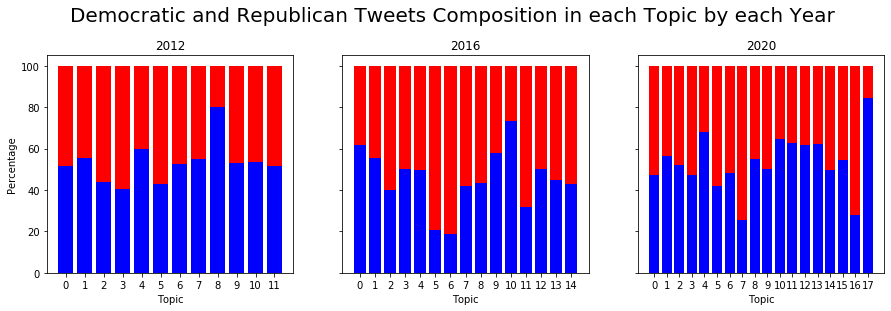

In [89]:
# Plot party distribution in each topic by year
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 4))
fig.suptitle('Democratic and Republican Tweets Composition in each Topic by each Year', fontsize = 20, y = 1.05)

# 2012
tix = np.arange(12)
ax1.bar(tix, report2012['D%'].values, color = 'blue')
ax1.bar(tix, report2012['R%'].values, bottom = report2012['D%'].values, color = 'red')
ax1.set_title('2012')
ax1.set_xticks(tix)
ax1.set_xlabel('Topic')
ax1.set_ylabel('Percentage')

# 2012
tix = np.arange(15)
ax2.bar(tix, report2016['D%'].values, color = 'blue')
ax2.bar(tix, report2016['R%'].values, bottom = report2016['D%'].values, color = 'red')
ax2.set_title('2016')
ax2.set_xticks(tix)
ax2.set_xlabel('Topic')

# 2020
tix = np.arange(18)
ax3.bar(tix, report2020['D%'].values, color = 'blue')
ax3.bar(tix, report2020['R%'].values, bottom = report2020['D%'].values, color = 'red')
ax3.set_title('2020')
ax3.set_xticks(tix)
ax3.set_xlabel('Topic')

plt.show()

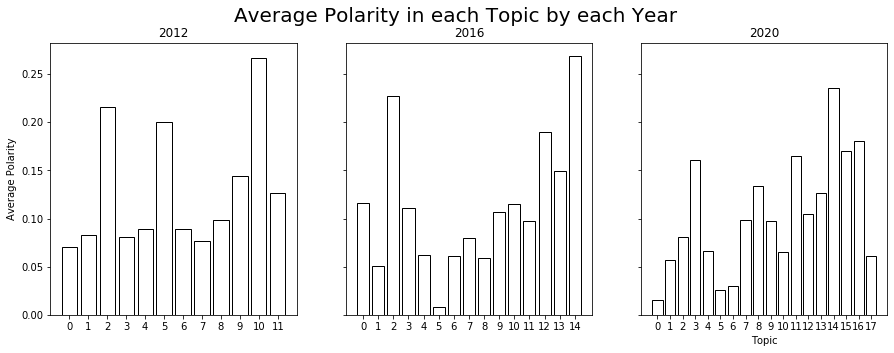

In [90]:
# Plot average polarity in each topic by year
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 5))
fig.suptitle('Average Polarity in each Topic by each Year', fontsize = 20)

# 2012
tix = np.arange(12)
ax1.bar(tix, report2012['PolarityMean'].values, color = 'white', edgecolor = 'k')
ax1.set_title('2012')
ax1.set_xticks(tix)
ax1.set_ylabel('Average Polarity')

# 2012
tix = np.arange(15)
ax2.bar(tix, report2016['PolarityMean'].values, color = 'white', edgecolor = 'k')
ax2.set_xticks(tix)
ax2.set_title('2016')

# 2020
tix = np.arange(18)
ax3.bar(tix, report2020['PolarityMean'].values, color = 'white', edgecolor = 'k')
ax3.set_title('2020')
ax3.set_xticks(tix)
ax3.set_xlabel('Topic')

plt.show()

## LDA visualization by pyLDAvis

In [91]:
pyLDAvis2012 = pyLDAvis.sklearn.prepare(lda_mod2012, vec_counts[ind2012] , vec)

In [92]:
pyLDAvis2016 = pyLDAvis.sklearn.prepare(lda_mod2016, vec_counts[ind2016] , vec)

In [93]:
pyLDAvis2020 = pyLDAvis.sklearn.prepare(lda_mod2020, vec_counts[ind2020] , vec) 

In [94]:
pyLDAvis.enable_notebook()

In [95]:
pyLDAvis.display(pyLDAvis2012)

In [99]:
# pyLDAvis.save_html(pyLDAvis2012, 'pyLDAvis2012.html')

In [96]:
pyLDAvis.display(pyLDAvis2016)

In [100]:
# pyLDAvis.save_html(pyLDAvis2016, 'pyLDAvis2016.html')

In [97]:
pyLDAvis.display(pyLDAvis2020)

In [102]:
# pyLDAvis.save_html(pyLDAvis2020, 'pyLDAvis2020.html')

# DO NOT RUN BELOW CODE

In [ ]:
# Prepare LDA visualization
    # pyLDAvis.sklearn.prepare(lda model, vectorized sparse matrix, vectorizer)
    # vectorizer is the vectorizer fit (not transform yet)
#pyLDAvis_train = pyLDAvis.sklearn.prepare(lda_mod, traincounts, vec) 

# Save LDA into a html
# pyLDAvis.save_html(pyLDAvis_train, 'trainingLDAvis.html')

# Enable pyLDAvis in jupyter notebook 
#pyLDAvis.enable_notebook()

# Display pyLDAvis
#pyLDAvis.display(pyLDAvis_train)